In [10]:
print 'sb'
import numpy as np
data=np.load('/home/share/TmpData/Qinglin/HCP_Group/MOTOR100_0.2.npy')


sb


In [11]:
from nilearn.decomposition.rbm import RBM
rbm=RBM(data.shape[1],30,epochs = 1)

rbm.train(data)

Epoch: 0 Error: 15.599895


In [14]:
#from nilearn.decomposition.rbm import getW

components_img=rbm.getW()
from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img, standardize=True)
masker.fit()

import numpy as np
components_img = masker.inverse_transform(np.transpose(components_img))

In [13]:
components_img.shape

(228453, 30)

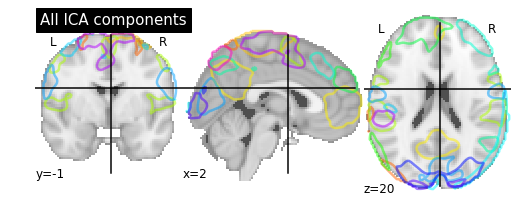

In [18]:
from nilearn.plotting import plot_prob_atlas

# Plot all ICA components together
plot_prob_atlas(components_img, title='All ICA components')
show()

/home/uga_qinglin/Documents/nilearn-deep/nilearn/plotting/find_cuts.py:285: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data[slices] *= 1.e-3
/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`ma

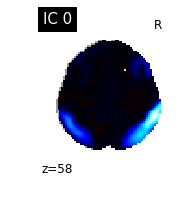

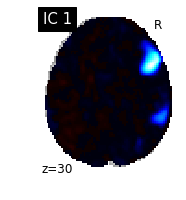

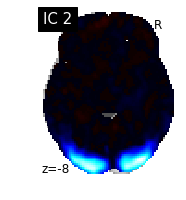

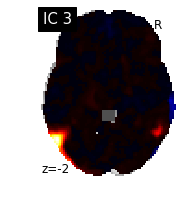

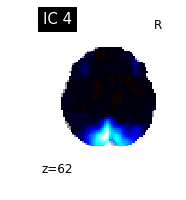

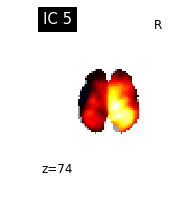

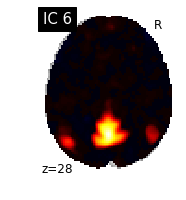

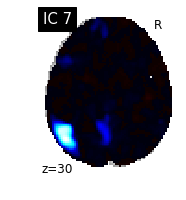

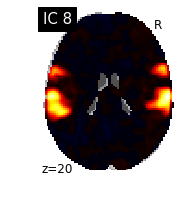

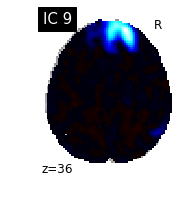

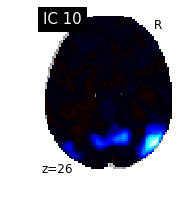

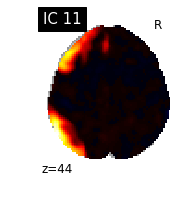

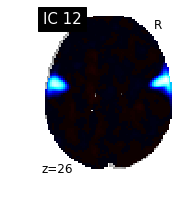

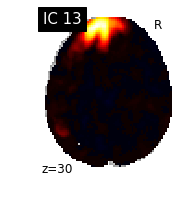

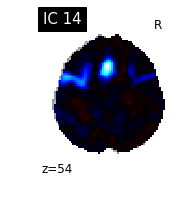

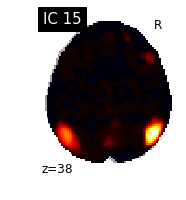

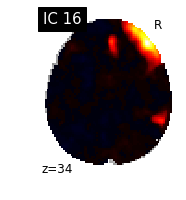

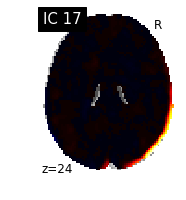

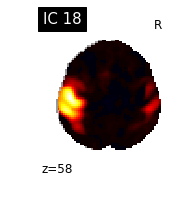

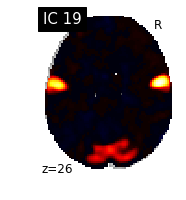

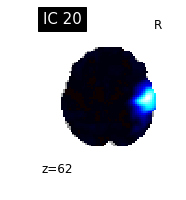

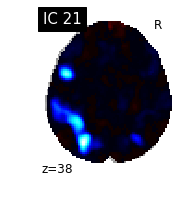

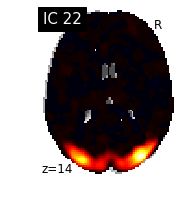

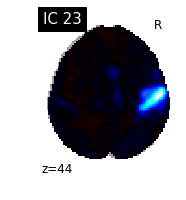

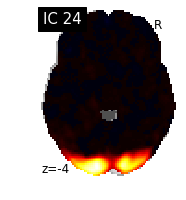

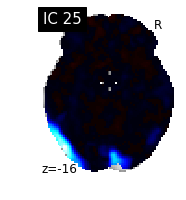

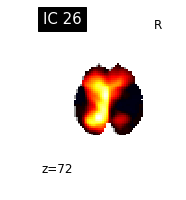

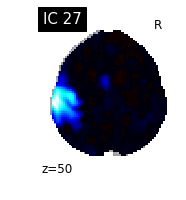

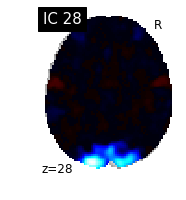

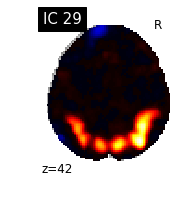

In [17]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()